In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

df = pandas.read_csv('data.csv')
df= df.iloc[:,1:]# remove index column
pandas.options.mode.chained_assignment=None # disable chained copy error(e.g. df[foo]=df[foo]*2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(4), object(2)
memory usage: 252.2+ KB


The question I am going to investigate with the dataset is whether or not there are clear preferences in musical taste for
this user. I will investigate this question from several different perspectives to determine what aspects of music the user
has an affinity for to establish a quantitative user profile.

In [2]:
profile = df[df['target']==1]
profile['duration_sec']=profile['duration_ms']/1000
profile['duration_min'] = profile['duration_sec']/60
num_attributes = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence','duration_min']

Musical Feeling


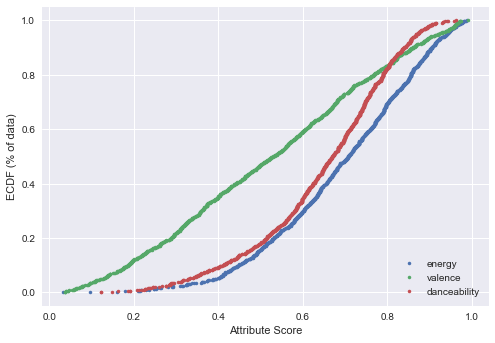

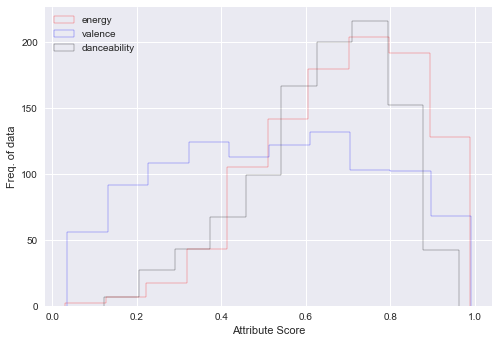

In [7]:
#### feel exploration 
x_en = numpy.sort(profile.energy)
y_en =numpy.arange(1,len(x_en)+1)/len(x_en)

x_val = numpy.sort(profile.valence)
y_val =numpy.arange(1,len(x_val)+1)/len(x_val)

x_dan = numpy.sort(profile.danceability)
y_dan =numpy.arange(1,len(x_dan)+1)/len(x_dan)

_=plt.plot(x_en,y_en,marker='.',linestyle='none')
_=plt.plot(x_val,y_val,marker='.',linestyle='none')
_=plt.plot(x_dan,y_dan,marker='.',linestyle='none')
plt.ylabel('ECDF (% of data)')
plt.xlabel('Attribute Score')
plt.legend(('energy','valence','danceability'),loc='lower right')
print('Musical Feeling')
plt.show()

_ = plt.hist(x=profile.energy,histtype='step',color='Red',alpha=0.9)
_ = plt.hist(x=profile.valence,histtype='step',color='blue',alpha=0.9)
_ = plt.hist(x=profile.danceability,histtype='step',color='black',alpha=0.9)
plt.xlabel('Attribute Score')
plt.legend(('energy','valence','danceability'),loc='upper left')
plt.ylabel('Freq. of data')
plt.show()

Above we can see the musical attributes that constitute the 'feel' of the music in terms of energy, valence (mood),
and dancability. Given the even distribution of the data, we can conclude that the user does not have a particular
preference for these attributes beyond a slight affinity for dancability that can be seen around the 90th percentile.
This finding is understandable given the wide fluctuations in moods and feelings that individuals generally seek out in 
their music

Sound Qualities


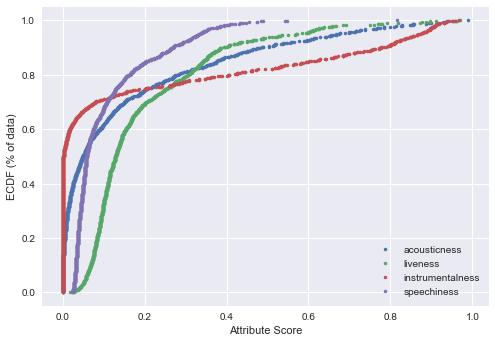

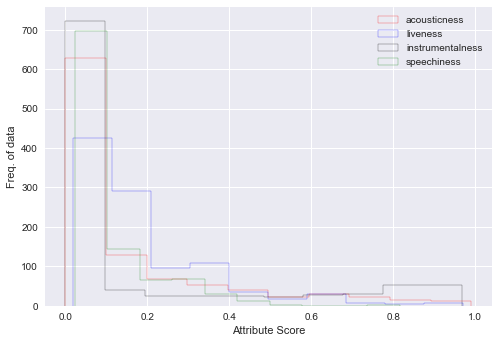

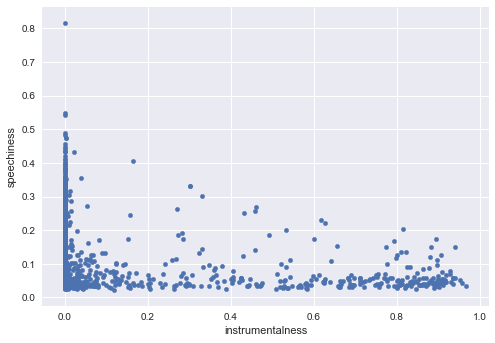

In [6]:
### sound exploration
x_act = numpy.sort(profile.acousticness)
y_act =numpy.arange(1,len(x_act)+1)/len(x_act)

x_liv = numpy.sort(profile.liveness)
y_liv =numpy.arange(1,len(x_liv)+1)/len(x_liv)

x_inst = numpy.sort(profile.instrumentalness)
y_inst =numpy.arange(1,len(x_inst)+1)/len(x_inst)

x_spe = numpy.sort(profile.speechiness)
y_spe =numpy.arange(1,len(x_spe)+1)/len(x_spe)

_=plt.plot(x_act,y_act,marker='.',linestyle='none')
_=plt.plot(x_liv,y_liv,marker='.',linestyle='none')
_=plt.plot(x_inst,y_inst,marker='.',linestyle='none')
_=plt.plot(x_spe,y_spe,marker='.',linestyle='none')
plt.ylabel('ECDF (% of data)')
plt.xlabel('Attribute Score')
plt.legend(('acousticness','liveness','instrumentalness','speechiness'),loc='lower right')
print('Sound Qualities')
plt.show()

_ = plt.hist(x=profile.acousticness,histtype='step',color='Red',alpha=0.9)
_ = plt.hist(x=profile.liveness,histtype='step',color='blue',alpha=0.9)
_ = plt.hist(x=profile.instrumentalness,histtype='step',color='black',alpha=0.9)
_ = plt.hist(x=profile.speechiness,histtype='step',color='green',alpha=0.9)
plt.legend(('acousticness','liveness','instrumentalness','speechiness'),loc='upper right')
plt.xlabel('Attribute Score')
plt.ylabel('Freq. of data')
plt.show()

profile.plot(x='instrumentalness',y='speechiness',kind='scatter')
plt.show()


Next, I investigate the sound qualities of the music in terms of content such as Acousticness. Here we find a clear
trend with data heavily concentrated on the lower end of these scales, indicating a clear preference of the user for less
Acousticness, non-live tracks. However, we see that both Instramentalness and Speechiness are both largely low scores,
suggesting the user likes tracks with less Speech and tracks with less Instramentals. While seemingly contradictory, to be
clear, low scores on instramentals does not mean that it is purely spoken word(as a 1 score on Speechiness would imply)
but rather that the instramentals are entirely background and secondary to vocals(ex. Buffalo by Toro y Moi - S=.026, I=0). 
We can therefore conclude that the user prefers tracks with a focus on vocals but a good amount of background tune.

Technical Music Profile
key


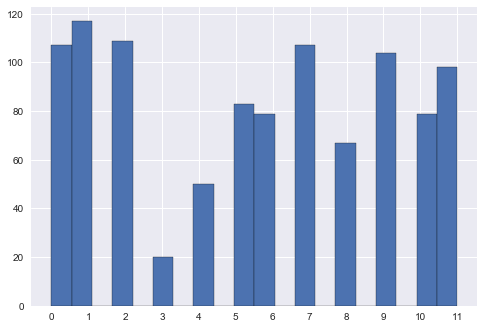

mode


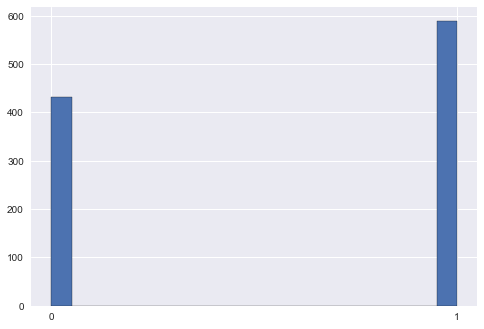

time_signature


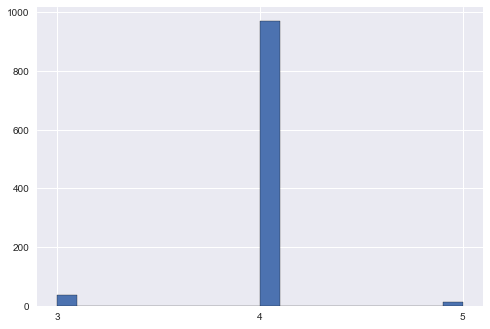

In [5]:
### attribute distrbutions
print('Technical Music Profile')
sns.set()
for att in profile[['key','mode','time_signature']]:
    print(att)
    plt.hist(profile[att],label='key',bins=20,ec='black')## ec puts outlines on the bars
    try:
        plt.xticks(range(profile[att].max()+1))
    except:
        plt.xticks(range(3,int(profile[att].max()+1)))
    plt.show()

Next, a look at the Technical components of the music reveals a few more clear trends. While our analysis of keys
(from C to B) does not reveal a clear preference, we can see that some keys(3=D#, 4=E) are much less preferred over others
(1=C#, 2=D, 3=D#). Mode shows us that while there is a preference for the user of 1=Major, 2=Minor is well represented
in the data. Finally, we can see a very clear preference of the user for a time signature of 4 BPM(Beats per measure). 
We can user this information to predict that this user will likely enjoy a track in D Major with a 4 time signature.

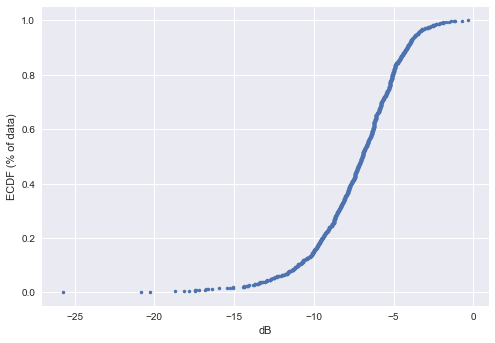

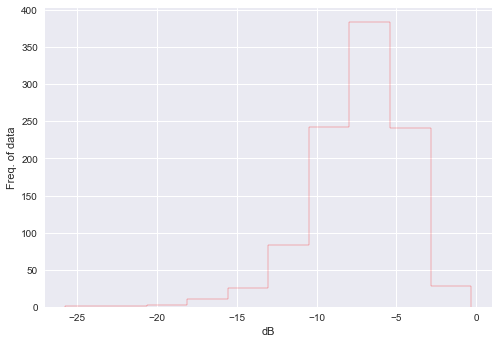

In [22]:
x_lou = numpy.sort(profile.loudness)
y_lou =numpy.arange(1,len(x_lou)+1)/len(x_lou)

_=plt.plot(x_lou,y_lou,marker='.',linestyle='none')
plt.ylabel('ECDF (% of data)')
plt.xlabel('dB')
plt.show()

plt.hist(x=profile.loudness,histtype='step',color='Red',alpha=0.9)
plt.xlabel('dB')
plt.ylabel('Freq. of data')
plt.show()

Looking at Loudness, we can see only a subtle perference for less loud tracks, with the user generally liking tracks
above -10 dB

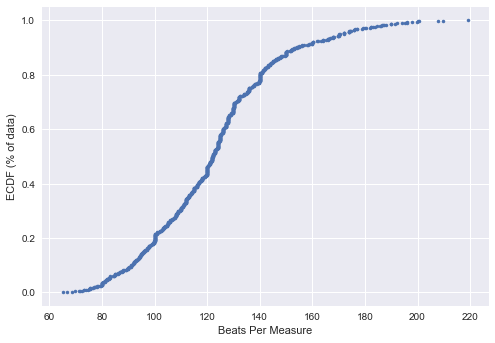

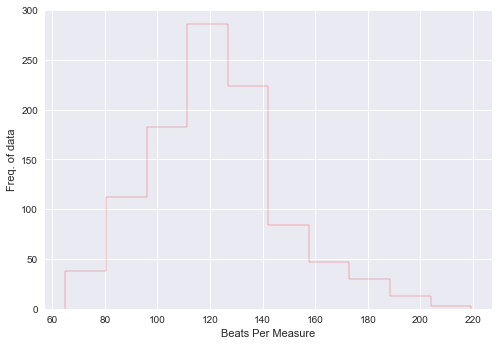

In [20]:
x_temp = numpy.sort(profile.tempo)
y_temp =numpy.arange(1,len(x_temp)+1)/len(x_temp)

_=plt.plot(x_temp,y_temp,marker='.',linestyle='none')
plt.ylabel('ECDF (% of data)')
plt.xlabel('Beats Per Measure')
plt.show()

plt.hist(x=profile.tempo,histtype='step',color='Red',alpha=0.9)
plt.xlabel('Beats Per Measure')
plt.ylabel('Freq. of data')
plt.show()

In looking at Tempo, we see an even distribution of the data with only a slight anomally around the 80th percentile.

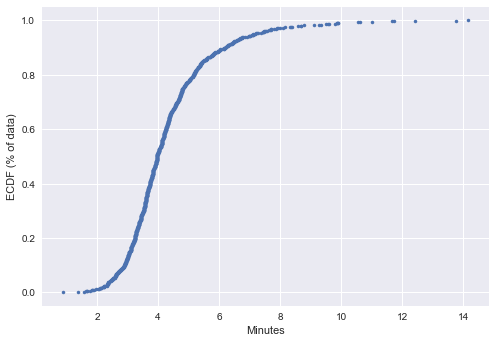

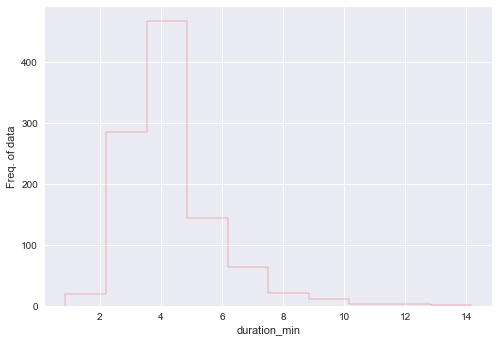

In [23]:
x_dur = numpy.sort(profile.duration_min)
y_dur =numpy.arange(1,len(x_dur)+1)/len(x_dur)

_=plt.plot(x_dur,y_dur,marker='.',linestyle='none')
plt.ylabel('ECDF (% of data)')
plt.xlabel('Minutes')
plt.show()

plt.hist(x=profile.duration_min,histtype='step',color='Red',alpha=0.9)
plt.xlabel('duration_min')
plt.ylabel('Freq. of data')
plt.show()

With Duration, we can conclude that the user prefers songs between ~2 - ~6 mintues.

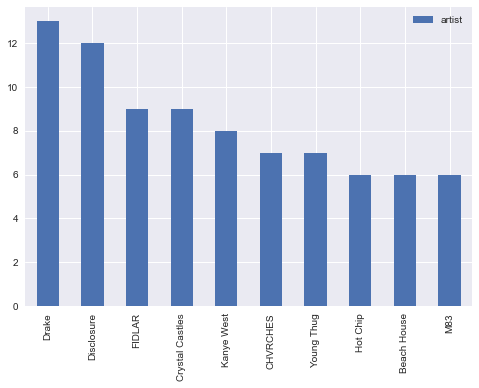

In [9]:
top10artists = pandas.DataFrame(profile['artist'].value_counts())
top10artists = top10artists.iloc[:10]
top10artists.plot(kind='bar')
plt.show()

Finally, looking at the artists that occur the most in the data, we can select out the top 10 and graph them above.